<a href="https://colab.research.google.com/github/dharma610/Project/blob/master/project_including_beta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

     |████████████████████████████████| 1.0MB 2.7MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.1-cp36-none-any.whl size=364065 sha256=79bad2ff593c7944baeb192a9656c9999aa48aebbb00efb0bde35118e3acfbd0
  Stored in directory: /root/.cache/pip/wheels/38/68/06/d119af6c3f9a2d1e123c1f72d276576b457131b3a7bf94e402
Successfully built mpld3


In [2]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [3]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

In [4]:
import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [5]:
beta = []
for i in range(1000):
  beta.append(2*gamma[i])  #Parameters can be seen as list beta and gamma

In [6]:
P = []
Q = []
M  = []
for i in range(1000): #Plotted for 2 sets
  N = 1000
  S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, I0, R0 # Initial conditions vector
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i]))
  S, I, R = ret.T
  P.append(S)
  Q.append(I)
  M.append(R)

  

In [7]:
beta_list = []
for i in range(1000):
  for j in range(10):
    beta_list.append(beta[i])

In [8]:
import pandas as pd
Beta = pd.DataFrame(beta_list)

In [9]:

from random import sample

In [10]:
S_value = pd.DataFrame(P)
S_value.to_csv("Susceptible.csv")

In [11]:
I_value = pd.DataFrame(Q)
I_value.to_csv("Infected.csv")

In [12]:
R_value = pd.DataFrame(M)
R_value.to_csv("Recovered.csv")

In [13]:
S_list = []
S_actual = []
I_list = []
I_actual = []
R_list = []
R_actual = []
for i in range(1000):
  p = sample(range(0, 99), 10)
  S_list.append(S_value[p].iloc[i].to_list())
  S_actual.append(S_value[[x+1 for x in p]].iloc[i].to_list())
  I_list.append(I_value[p].iloc[i].to_list())
  I_actual.append(I_value[[x+1 for x in p]].iloc[i].to_list())
  R_list.append(R_value[p].iloc[i].to_list())
  R_actual.append(R_value[[x+1 for x in p]].iloc[i].to_list())
  


In [14]:
sus_list = []
for i in range(1000):
 sus_list = sus_list+S_list[i]
  



In [15]:
infected_list = []
for i in range(1000):
 infected_list = infected_list+I_list[i]
  



In [16]:
recov_list = []
for i in range(1000):
 recov_list = recov_list+R_list[i]
  



In [17]:
susactual_list = []
for i in range(1000):
 susactual_list = susactual_list+S_actual[i]

In [18]:
infectedactual_list = []
for i in range(1000):
 infectedactual_list = infectedactual_list+I_actual[i]

In [19]:
recovactual_list = []
for i in range(1000):
 recovactual_list = recovactual_list+R_actual[i]

In [20]:
df_1 = pd.DataFrame(sus_list)
df_2 = pd.DataFrame(infected_list)
df_3 = pd.DataFrame(recov_list)
df_4 = pd.DataFrame(susactual_list)
df_5 = pd.DataFrame(infectedactual_list)
df_6 = pd.DataFrame(recovactual_list)

In [21]:
data = pd.concat([df_1, df_2,df_3,df_4,df_5,df_6,Beta], axis=1)


In [22]:
data.columns = range(data.shape[1])
data

,0,1,2,3,4,5,6
0,202.850446,6.660396e-03,797.142893,202.848817,4.273892e-03,797.146909,1.493028
1,992.163885,4.402876e+00,3.433239,982.601676,9.122847e+00,8.275477,1.493028
2,202.852985,1.037947e-02,797.136635,202.850446,6.660396e-03,797.142893,1.493028
3,982.601676,9.122847e+00,8.275477,963.281048,1.851417e+01,18.204782,1.493028
4,202.845900,-4.133446e-10,797.154100,202.845900,-4.246326e-10,797.154100,1.493028
...,...,...,...,...,...,...,...
9995,266.976011,7.322601e+01,659.797978,247.746457,5.507910e+01,697.174447,1.170906
9996,203.517116,9.805504e-01,795.502334,203.319801,6.928671e-01,795.987332,1.170906
9997,202.845900,6.512704e-10,797.154100,202.845900,3.550036e-10,797.154100,1.170906
9998,939.466464,2.981221e+01,30.721328,897.877676,4.876186e+01,53.360468,1.170906


In [47]:
X = data[[0,1,2]]
X_without_beta = data[[0,1,2,]]
y = data[[3,4,5]]

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
# load the dataset
# define the keras model
model = Sequential()
model.add(Dense(64, input_dim=3, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32,  activation='relu'))
model.add(Dense(16,  activation='relu'))
model.add(Dense(16,  activation='relu'))
model.add(Dense(3, activation='relu'))
# compile the keras model
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# fit the keras model on the dataset
history = model.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)




Epoch 00001: val_accuracy improved from -inf to 0.99500, saving model to weights-improvement-01-1.00.hdf5


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '



Epoch 00002: val_accuracy did not improve from 0.99500

Epoch 00003: val_accuracy did not improve from 0.99500

Epoch 00004: val_accuracy improved from 0.99500 to 0.99625, saving model to weights-improvement-04-1.00.hdf5

Epoch 00005: val_accuracy did not improve from 0.99625

Epoch 00006: val_accuracy did not improve from 0.99625

Epoch 00007: val_accuracy did not improve from 0.99625

Epoch 00008: val_accuracy did not improve from 0.99625

Epoch 00009: val_accuracy did not improve from 0.99625

Epoch 00010: val_accuracy did not improve from 0.99625

Epoch 00011: val_accuracy did not improve from 0.99625

Epoch 00012: val_accuracy did not improve from 0.99625

Epoch 00013: val_accuracy did not improve from 0.99625

Epoch 00014: val_accuracy did not improve from 0.99625

Epoch 00015: val_accuracy did not improve from 0.99625

Epoch 00016: val_accuracy did not improve from 0.99625

Epoch 00017: val_accuracy did not improve from 0.99625

Epoch 00018: val_accuracy did not improve from 0.

In [53]:
predicted_y = model.predict(X_test)

In [54]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predicted_y)


268.0610296479535

In [55]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

2000/2000 [==============================] - 0s 24us/step
Accuracy: 99.60


In [56]:
y_pred1 = model.predict(X_train)
y_pred2 = model.predict(X_test)

In [57]:
df_7 = pd.DataFrame(y_pred1)
df_8 = pd.DataFrame(y_pred2)

In [58]:
df_7      #columns are in S,I,R order

,0,1,2
0,943.531555,7.058104,0.765856
1,503.730713,139.192368,343.222626
2,204.638092,0.000000,795.840637
3,204.636414,0.000000,795.833191
4,204.638092,0.000000,795.840637
...,...,...,...
7995,204.638092,0.000000,795.840637
7996,204.638092,0.000000,795.840637
7997,204.638092,0.000000,795.840637
7998,948.299377,4.253435,0.000000


In [59]:
y_test

,3,4,5
6252,946.760204,2.638533e+01,26.854467
4684,202.851997,8.932023e-03,797.139071
1731,202.845900,-8.065442e-11,797.154100
4742,202.852804,1.011401e-02,797.137082
4521,202.845900,3.802384e-08,797.154100
...,...,...,...
6412,203.392398,7.987674e-01,795.808835
8285,997.064027,1.966077e+00,0.969895
7853,383.499000,1.377921e+02,478.708886
1095,994.382314,3.301174e+00,2.316512


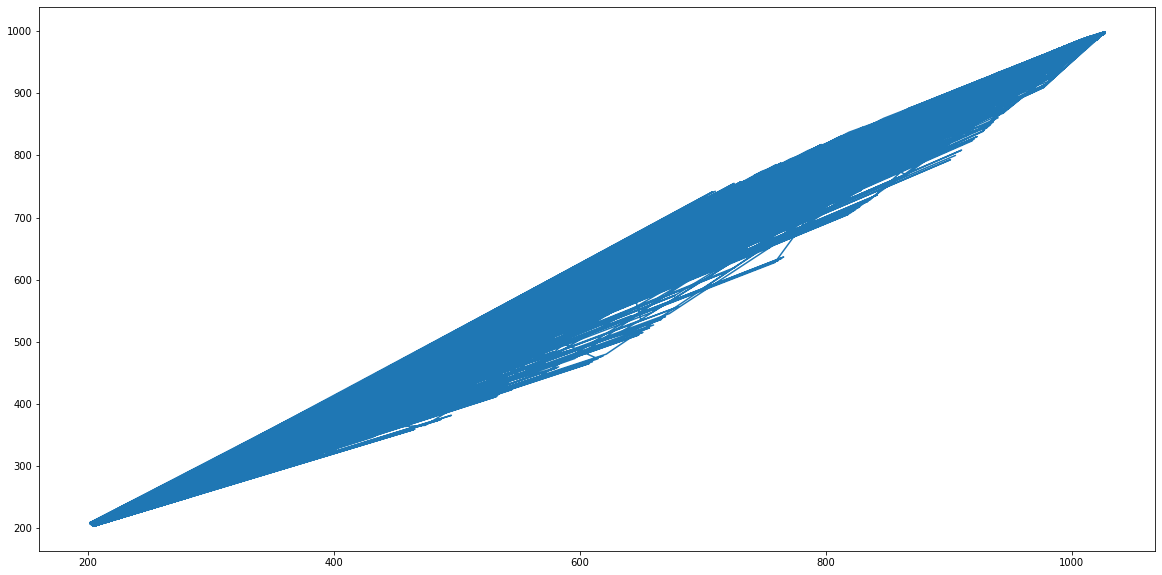

In [60]:
plt.figure(figsize=(20,10))
plt.plot(df_7[0],y_train[3])    #plot of S_pred1 vs s_actual1                
                                #pred1 corresponds to prediction on training sets , where as actual1 corresponds actual value(y_train)
                                

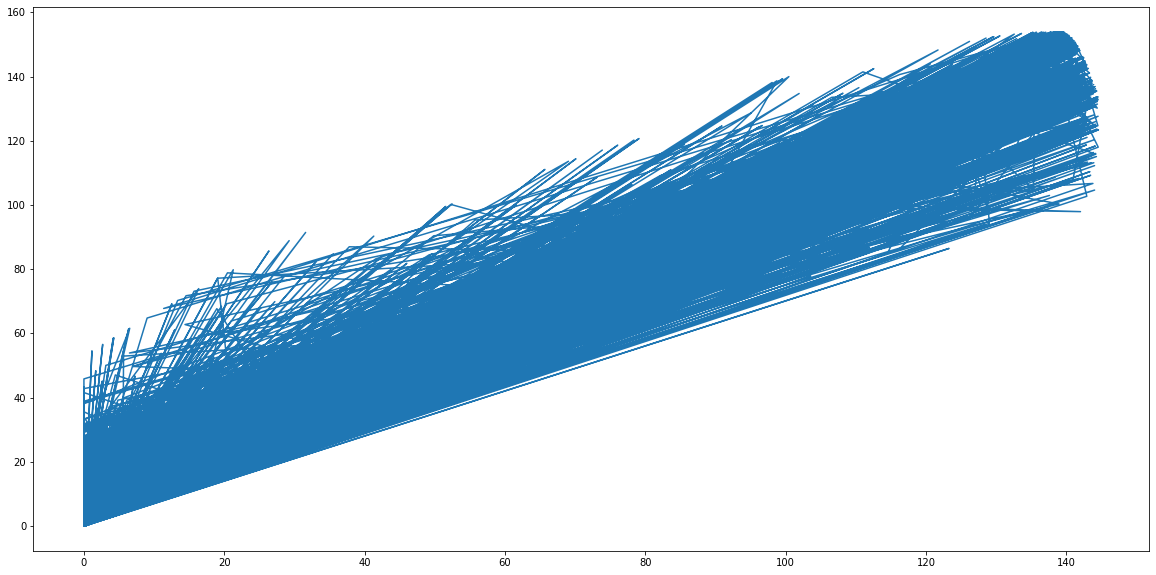

In [61]:
plt.figure(figsize=(20,10))
plt.plot(df_7[1],y_train[4])    #plot of I_pred1 vs I_actual1

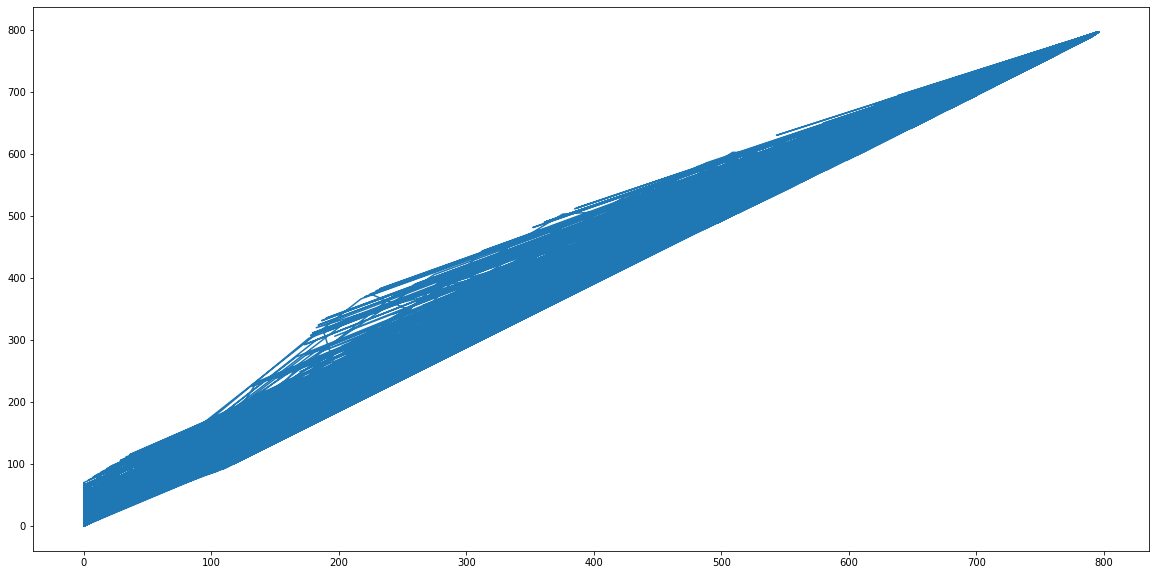

In [62]:
plt.figure(figsize=(20,10))
plt.plot(df_7[2],y_train[5])    #plot of R_pred1 vs R_actual1

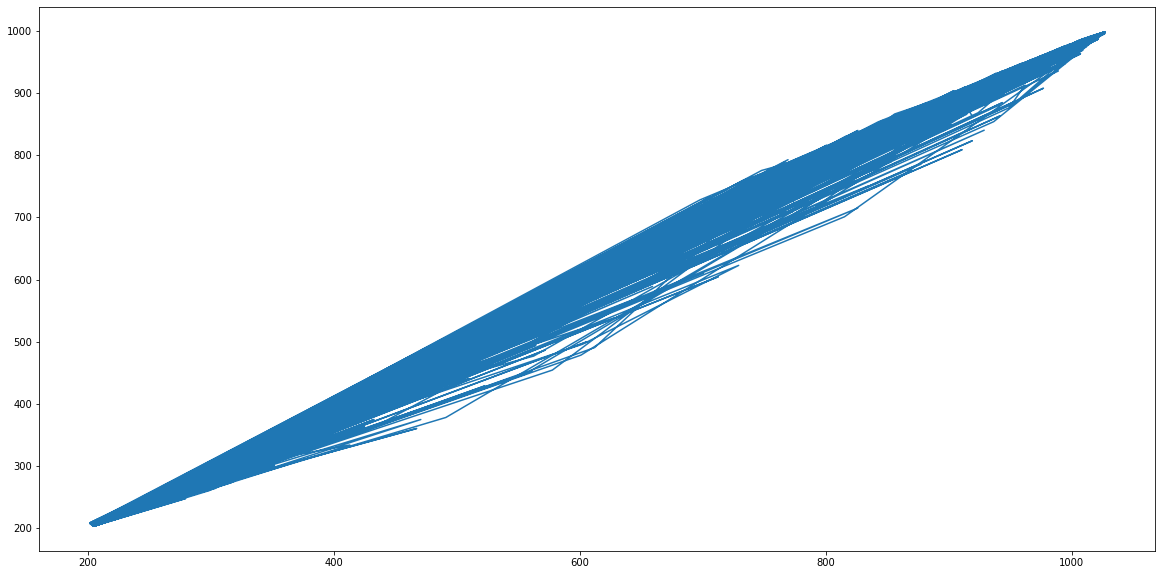

In [63]:
plt.figure(figsize=(20,10))
plt.plot(df_8[0],y_test[3])    #plot of S_pred2 vs S_actual2
                               #pred2 corresponds to prediction on test sets , where as actual2 corresponds actual value(y_test)

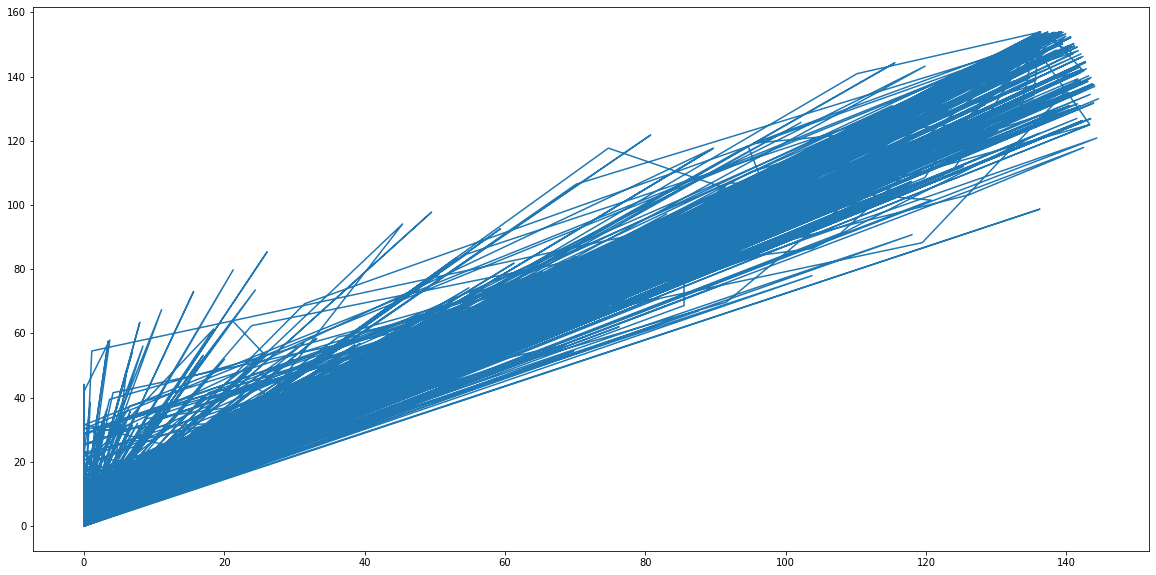

In [64]:
plt.figure(figsize=(20,10))
plt.plot(df_8[1],y_test[4])    #plot of I_pred2 vs I_actual2

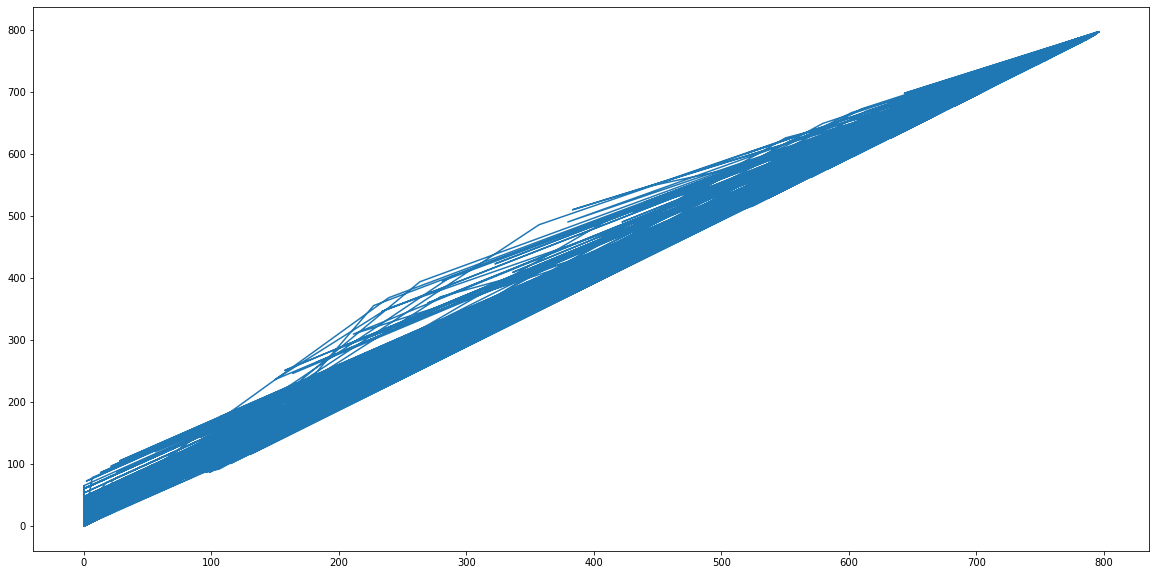

In [65]:
plt.figure(figsize=(20,10))
plt.plot(df_8[2],y_test[5])    #plot of R_pred2 vs R_actual2